In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Dummy data to plot with pyplot

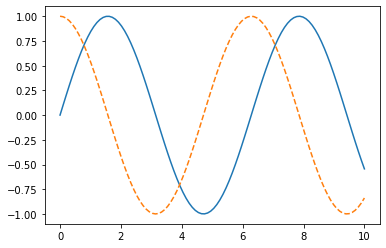

In [2]:
import numpy as np
x = np.linspace(0, 10, 100)
#print(x)
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

# Let's import our dataset with Pandas

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('fortune500.csv')

In [5]:
df.head()

Year  Rank           Company  Revenue (in millions) Profit (in millions)
0  1955     1    General Motors                 9823.5                  806
1  1955     2       Exxon Mobil                 5661.4                584.8
2  1955     3        U.S. Steel                 3250.4                195.4
3  1955     4  General Electric                 2959.1                212.6
4  1955     5            Esmark                 2510.8                 19.1

In [6]:
df.tail()

Year  Rank                Company  Revenue (in millions)  \
25495  2005   496        Wm. Wrigley Jr.                 3648.6   
25496  2005   497         Peabody Energy                 3631.6   
25497  2005   498  Wendy's International                 3630.4   
25498  2005   499     Kindred Healthcare                 3616.6   
25499  2005   500   Cincinnati Financial                 3614.0   

      Profit (in millions)  
25495                  493  
25496                175.4  
25497                 57.8  
25498                 70.6  
25499                  584

# Let’s just rename those columns so we can refer to them later

In [7]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']

In [8]:
len(df)

25500

In [9]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

# Let's make sure we have only numeric values in the "profit" column

In [10]:
non_numberic_profits = df.profit.str.contains('[^0-9.-]')
df.loc[non_numberic_profits].head()

year  rank                company  revenue profit
228  1955   229                 Norton    135.0   N.A.
290  1955   291        Schlitz Brewing    100.0   N.A.
294  1955   295  Pacific Vegetable Oil     97.9   N.A.
296  1955   297     Liebmann Breweries     96.0   N.A.
352  1955   353     Minneapolis-Moline     77.4   N.A.

In [11]:
#print non_numberic_profits
set(df.profit[non_numberic_profits])

{'N.A.'}

In [12]:
len(df.profit[non_numberic_profits])

369

Text(0.5, 1.0, 'Number of null fields in the profit column per year')

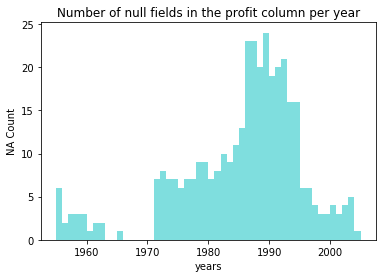

In [13]:
n, bins, patches = plt.hist(df.year[non_numberic_profits].values, bins=range(1955, 2006), color='c', alpha=0.5)

plt.xlabel('years')
plt.ylabel('NA Count')
plt.title('Number of null fields in the profit column per year')

In [14]:
type(df.year[non_numberic_profits]) # that's why we used df.year[non_numberic_profits].values in plt.hist()


pandas.core.series.Series

In [15]:
df = df.loc[~non_numberic_profits]

In [16]:
len(df)

25131

In [17]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

In [18]:
df.profit = pd.to_numeric(df.profit) #df.profit.convert_objects(convert_numeric=True)

In [19]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

# Plotting with matplotlib

In [20]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
group_by_year.head()

year   revenue   profit
0      1955    9823.5    806.0
1      1955    5661.4    584.8
2      1955    3250.4    195.4
3      1955    2959.1    212.6
4      1955    2510.8     19.1
...     ...       ...      ...
25000  2005  288189.0  10267.0
25001  2005  270772.0  25330.0
25002  2005  193517.0   2805.0
25003  2005  172233.0   3487.0
25004  2005  152363.0  16593.0

[255 rows x 3 columns]

In [21]:
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit
y2 = avgs.revenue

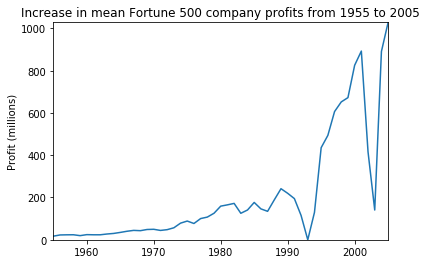

In [22]:
fig, ax = plt.subplots()
ax.set_title("Increase in mean Fortune 500 company profits from 1955 to 2005")
ax.set_ylabel("Profit (millions)")
ax.plot(x, y1)
ax.margins(x=0, y=0)

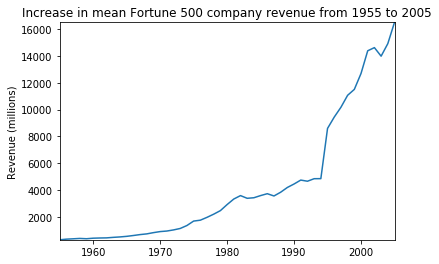

In [23]:
fig, ax = plt.subplots()
ax.set_title("Increase in mean Fortune 500 company revenue from 1955 to 2005")
ax.set_ylabel("Revenue (millions)")
ax.plot(x, y2)
ax.margins(x=0, y=0)

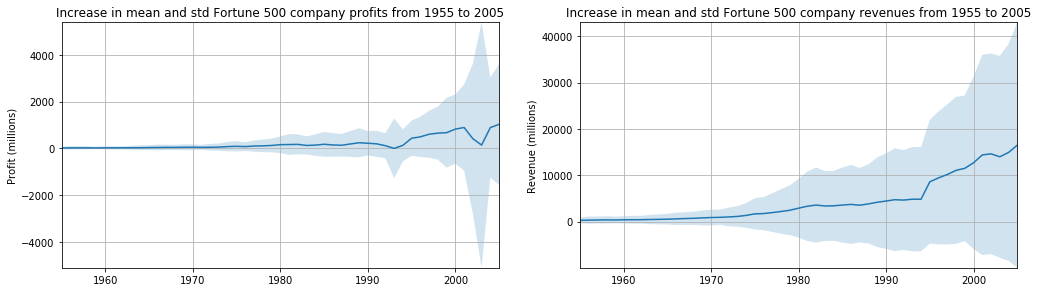

In [24]:
stds1 = group_by_year.std().profit.values
stds2 = group_by_year.std().revenue.values
# set up the figure
fig, (ax1, ax2) = plt.subplots(ncols=2)
title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2005'
fig.set_size_inches(14, 4)
fig.tight_layout(w_pad=5, h_pad=1.0)
# set up the subplots
ax1.plot(x, y1)
ax2.plot(x, y2)
ax1.fill_between(x, y1.values - stds1, y1.values + stds1, alpha=0.2)
ax2.fill_between(x, y2.values - stds2, y2.values + stds2, alpha=0.2)
ax1.set_title(title % 'profits')
ax2.set_title(title % 'revenues')
ax1.set_ylabel("Profit (millions)")
ax2.set_ylabel("Revenue (millions)")
ax1.margins(x=0, y=0)
ax2.margins(x=0, y=0)
ax1.grid(True)
ax2.grid(True)

## Ploting with plotly

# to list installed python modules:
pydoc modules

##to install modules in my home directotry:

pip install --user <module_name>

In [25]:
import plotly

ModuleNotFoundError: No module named 'plotly'

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
#df_avgs = pd.DataFrame(list(zip(x,y1,y2)),columns=["x","y1","y2"])
#labels = x[:10]
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x = x[:10], y = y1[:10], name="Profits"),row=1, col=1)
fig.add_trace(go.Scatter(x = x[:10], y = y2[:10], name="Revenues"),row=1, col=2)
#fig.add_trace(go.Pie(labels=labels, values=y2[:10], name="revenues"),1, 2)
fig.update_layout(title_text='increase in 500 companies profit and revenue')

In [ ]:
fig2 = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.02)
fig2.add_trace(go.Scatter(x = x[:10], y = y1[:10], name="Profits"),row=1, col=1)
fig2.add_trace(go.Scatter(x = x[:10], y = y2[:10], name="Revenues"),row=2, col=1)


In [ ]:
fig3 = make_subplots(rows=1, cols=2, shared_xaxes=True)
fig3.add_trace(go.Bar(x = x[:10], y = y1[:10], name="Profits"),row=1, col=1)
fig3.add_trace(go.Bar(x = x[:10], y = y2[:10], name="Revenues"),row=1, col=2)

In [ ]:
df['company'].head()

In [ ]:
df['company'][0]

In [ ]:
GenMot_exx = df.loc[(df['company']=='General Motors') | (df['company']== "Exxon Mobil")]

In [ ]:
GenMot_exx.tail()

In [ ]:
fig = go.Figure(data=[go.Pie(labels=GenMot_exx.loc[GenMot_exx['year']==2005,'company'],
                             values=GenMot_exx.loc[GenMot_exx['year']==2005,'profit'])])
fig.show()

In [ ]:
fig = go.Figure(data=[go.Bar(x=GenMot_exx.loc[GenMot_exx['year']==2005,'company'],
                             y=GenMot_exx.loc[GenMot_exx['year']==2005,'profit'], marker_color="green", width=0.2)])
fig.show()

In [ ]:
lables = ['2004','2005']
profit_EM = GenMot_exx.loc[(GenMot_exx['company']=='Exxon Mobil')&
                           ((GenMot_exx['year']==2004)|(GenMot_exx['year']==2005)),"profit"]
profit_GM = GenMot_exx.loc[(GenMot_exx['company']=='General Motors')&
                           ((GenMot_exx['year']==2004)|(GenMot_exx['year']==2005)),"profit"]
print(profit_EM)
print(profit_GM)
fig = go.Figure(data=[go.Bar(x=lables, y=profit_EM, width=0.1, name="EM"), 
                      go.Bar(x=lables, y=profit_GM, width=0.1, name="GM")])
fig.update_layout(barmode='group',
                  bargap=0.75, # gap between bars of adjacent location coordinates.
                  bargroupgap=0.1, # gap between bars of the same location coordinate.
                  xaxis_tickangle=-45)


In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=lables, y=profit_EM, name="EM", marker_color="gray", width=0.2))
fig.add_trace(go.Bar(x=lables, y=profit_GM, name="GM", marker_color="green", width=0.2))
fig.update_layout(barmode='stack', xaxis_tickangle=-45)

In [ ]:
GenMot_exx['company_code'] = [1 if x=="Exxon Mobil" else 2 for x in GenMot_exx['company']]
#print(GenMot_exx['company_code'])
fig = go.Figure(data=
    go.Parcoords(
        line_color='blue',
        dimensions = list([
            dict(range = [1955,2005],
                 constraintrange = [2000,2005], # change this range by dragging the pink line
                 label = 'Year', values = GenMot_exx['year']),
            dict(range = [GenMot_exx['rank'].min(),GenMot_exx['rank'].max()],
                 tickvals = GenMot_exx['rank'].unique(),
                 label = 'Rank', values = GenMot_exx['rank']),
            dict(range = [1,2],
                 tickvals = [1,2],
                 label = 'Company', values = GenMot_exx['company_code'],
                 ticktext = GenMot_exx['company'].unique()
                 ),
            dict(range = [GenMot_exx['profit'].min(),GenMot_exx['profit'].max()],
                 label = 'Profit', values = GenMot_exx['profit']),
            
        ])
    )
)
fig.show()

In [ ]:
!pip install --upgrade bokeh

In [ ]:
from bokeh.io import show, output_notebook, curdoc
from bokeh.plotting import figure
from ipywidgets import interact
from bokeh.layouts import row, column, widgetbox
from bokeh.models import ColumnDataSource
from bokeh.models.widgets import Slider, TextInput, Button, Paragraph, Select

output_notebook()



In [ ]:
def modify_doc(doc):
    
    # create some widgets
    button = Button(label="Say HI")
    input = TextInput(value="Bokeh")
    output = Paragraph()

    # add a callback to a widget
    def update():
        output.text = "Hello, " + input.value
    button.on_click(update)

    # create a layout for everything
    layout = column(button, input, output)

    # add the layout to curdoc
    doc.add_root(layout)
    
# In the notebook, just pass the function that defines the app to show
# You may need to supply notebook_url, e.g notebook_url="http://localhost:8889" 
show(modify_doc)#, notebook_url="http://localhost:8889") 

In [ ]:
N = 200
xspace = np.linspace(0, 4*np.pi, N)
yfun = np.sin(x)

def modify_doc(doc):
    
    dtsource = ColumnDataSource(data=dict(x=xspace, y=yfun))

    # Slidert up plot
    plot = figure(plot_height=400, plot_width=400, title="my sine wave",
              tools="crosshair,pan,reset,save,wheel_zoom",
              x_range=[0, 4*np.pi], y_range=[-2.5, 2.5])

    plot.line(x='x', y='y', source=dtsource, line_width=3, line_alpha=0.6)


    # Set up widgets
    text = TextInput(title="title", value='my sine wave')
    offset = Slider(title="offset", value=0.0, start=-5.0, end=5.0, step=0.1)
    amplitude = Slider(title="amplitude", value=1.0, start=-5.0, end=5.0, step=0.1)
    phase = Slider(title="phase", value=0.0, start=0.0, end=2*np.pi)
    freq = Slider(title="frequency", value=1.0, start=0.1, end=5.1, step=0.1)


    # Set up callbacks
    def update_title(attrname, old, new):
        plot.title.text = text.value

    text.on_change('value', update_title)

    def update_data(attrname, old, new):

        # Get the current slider values
        a = amplitude.value
        b = offset.value
        w = phase.value
        k = freq.value

        # Generate the new curve
        x = np.linspace(0, 4*np.pi, N)
        y = a*np.sin(k*x + w) + b

        dtsource.data = dict(x=x, y=y)

    for w in [offset, amplitude, phase, freq]:
        w.on_change('value', update_data)


    # Set up layouts and add to document
    inputs = widgetbox(text, offset, amplitude, phase, freq)
    layout = row(inputs,plot, width=800)
    doc.add_root(layout)
#curdoc().add_root(row(inputs, plot, width=800)) #(layout)#
#curdoc().title = "Sliders"
show(modify_doc)

In [ ]:
def modify_doc(doc):
    dfsource = ColumnDataSource(data=dict(
                                        year=df['year'],
                                        profit=df['profit'],
                                        rank=df['rank'],
                                        company=df['company'],
                                        revenue=df['revenue']))
    x = avgs.index
    source = ColumnDataSource(data=dict(
                                       x=x,
                                       y1=y1,
                                       y2=y2))
    TOOLS = 'tap'
    """"plot = figure(plot_width=1300, plot_height=900, tools=TOOLS, toolbar_location=None, title='Profit')
    plot.circle(x='year', y='profit', size=5, color='blue', legend_label='company', source=source,
                  hover_fill_color="black",
                  fill_alpha=0.7, hover_alpha=1,
                  line_color=None, hover_line_color="white") #fill_color="blue"
    plot.line(x='year', y='profit', source=source, line_dash="4 4", line_width=1, color='gray')"""""
    
    
    plot = figure(plot_width=600, plot_height=500, tools=TOOLS, toolbar_location=None, title='Profit')
    
    plot.circle(x='x', y='y1', size=5, color='green', source=source,
                  hover_fill_color="black",
                  fill_alpha=0.7, hover_alpha=1,
                  line_color=None, hover_line_color="white") #fill_color="blue"
    
    plot.line(x='x', y='y1', source=source, line_dash="4 4", line_width=1, color='gray')
    
    
    plot2 = figure(plot_width=600, plot_height=500, tools=TOOLS, toolbar_location=None, title='Revenu')
    
    plot2.circle(x='x', y='y2', size=5, color='green', source=source,
                  hover_fill_color="black",
                  fill_alpha=0.7, hover_alpha=1,
                  line_color=None, hover_line_color="white") #fill_color="blue"
    
    plot2.line(x='x', y='y2', source=source, line_dash="4 4", line_width=1, color='gray')
    
    
    #plot.line(x='x', y='y2', source=source, line_width=1.5, color='blue')
    
    # Set up widgets
    text = TextInput(title="Title", value='Profit')
    select = Select(title="Index", value="50", options=["10", "20", "30", "40", "50"])


    # Set up callbacks
    def update_title(attrname, old, new):
        plot.title.text = text.value

    text.on_change('value', update_title)

    def update_data(attrname, old, new):

        # Get the current select value
        a = select.value
        # Generate the new source
        xsubset = x[:int(a)]
        y1subset = y1[:int(a)]
        y2subset = y2[:int(a)]
        
        source.data = dict(x=xsubset, y1=y1subset, y2=y2subset)

    select.on_change('value', update_data)


    # Set up layouts and add to document
    inputs = widgetbox(text, select)
    layout = row(inputs,plot,plot2, width=700)
    doc.add_root(layout)

show(modify_doc)